# Restaurant Competitive Landscape in Toronto - Market Segmentation

#### A Clustering Approach to Market Segmentation of Restaurants in Toronto 

## Introduction: 

##### Business Proposal
The current coronovirus pandemic has placed significant strains on Toronto's diverse and once flourishing restaurant scene. As strict counter-measures have confined would-be patrons to their homes, and restaurant owners forced to close their doors, the future of the restaurant business in the city is enshrowded in uncertainty. 

Now, more than ever, it is critical for restauranteurs to understand their market segment and its competitive landscape to accurately assess the risks they face moving forward. 

Market segmentation is of course an unsupervised learning problem. To that end, clustering algorithms like k-mean and lend themselves well. In this project, I will be clustering restaurants in Toronto into segments based on the similarities of relevant characteristics. Hence, each restaurant will be assigned to a cluster based on similarity to other restaurants (according to the restaurant's non-geographic features: price, kind of food, reviews, etc).

#### Data Requirements
In order to segment the restaurant market in Toronto, we will need to gather data on the most relevant features of each restaurant. These will include: 
1. location
2. restaurant type (eg. Chinese, Pizza, etc) 
3. price point 
4. other attributes (eg. open late, patio, etc)

To this end, a library of Toronto restaurants will be scraped from the NOW Toronto website. Since **NOW Toronto does not provide data on prices**, we will be calling the **Foursquare API to collect price data.** 


## Restaurants

In [3]:
# import data processing libraries
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
!conda install -c conda-forge folium=0.5.0 --yes
import folium #map rendering
%matplotlib inline

# import requests
import requests
from pandas.io.json import json_normalize #transform json into pd df 

print('All libraries successfully imported')

Solving environment: ...working... 
  - anaconda/win-64::openssl-1.1.1d-he774522_2
  - defaults/win-64::openssl-1.1.1d-he774522_2done

# All requested packages already installed.

All libraries successfully imported


In [5]:
# install beautiful soup
!pip install beautifulsoup4
print('Successfully Installed')

Successfully Installed


In [6]:
# import beautifulsoup and install/import webdrive from selenium 
from bs4 import BeautifulSoup
!pip install selenium
from selenium import webdriver

### Import Selenium WebDriver to scrape restaurant features from NOW Toronto website

In [7]:
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
print('Done importing')

Done importing


### Build bot to scrape restaurant data

The NOW Toronto website contains a catalog of most of the restaurants in Toronto and provides details on location, restaurant type, and other relevant attributes. We will build a bot that will collect this data page by page and store it in a dataframe. 

URL: https://nowtoronto.com/search/location/restaurants/#letter_filter=all&ord=last_modified&page=1

In [8]:
# create empty df to store restaurant names, address, features, description, close status

driver = webdriver.Chrome('C:\Program Files (x86)\Google\Chrome\Application\chromedriver')

restaurants = pd.DataFrame(columns = ['name', 'address', 'features', 'description'])

n_pages = 113
url = 'https://nowtoronto.com/search/location/restaurants/#letter_filter=all&ord=alpha&page=113'
driver.get(url)
iterations_counter = 0

while n_pages >= 1: 
    
    n_items = len(driver.find_elements_by_css_selector('.location_result'))

    for i in range(1, n_items + 1): 
        
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, '#location_list_div > div:nth-child('+ str(i) +') > div.loc_info > h4 > a')))
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, '#location_list_div > div:nth-child('+ str(i) +') > div.loc_info > p > a')))
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, '#location_list_div > div:nth-child('+ str(i) +') > div.details > p.feats')))
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, '#location_list_div > div:nth-child('+ str(i) +') > div.details > p.description')))
        
        try: 
            
            name_element = driver.find_elements_by_css_selector('#location_list_div > div:nth-child('+ str(i) +') > div.loc_info > h4 > a')[0]
            name = name_element.text
            address_element = driver.find_elements_by_css_selector('#location_list_div > div:nth-child('+ str(i) +') > div.loc_info > p > a')[0]
            address = address_element.text
            features_element = driver.find_elements_by_css_selector('#location_list_div > div:nth-child('+ str(i) +') > div.details > p.feats')[0]
            features = features_element.text
            description_element = driver.find_elements_by_css_selector('#location_list_div > div:nth-child('+ str(i) +') > div.details > p.description')[0]
            description = description_element.text


            iterations_counter += 1 
            print('\r iteration: {}'. format(iterations_counter))

            restaurants.loc[len(restaurants)] = [name, address, features, description]
            
        except StaleElementReferenceException as e: 
            print(e)
        
    n_pages = n_pages - 1 
    previous_page = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'prev')))
#     previous_page = driver.find_element_by_class_name('prev')
    try: 
        previous_page.click()
    except: 
        print('Final page reached')

driver.close()


iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
Message: stale element reference: element is not attached to the page document
  (Session info: chrome=83.0.4103.97)

iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
Message: stale element reference: element is not attached to the page document
  (Session info: chrome=83.0.4103.97)

iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
Mes

iteration: 468
iteration: 469
iteration: 470
iteration: 471
iteration: 472
iteration: 473
iteration: 474
iteration: 475
iteration: 476
iteration: 477
iteration: 478
iteration: 479
iteration: 480
iteration: 481
iteration: 482
iteration: 483
iteration: 484
iteration: 485
iteration: 486
iteration: 487
iteration: 488
iteration: 489
iteration: 490
iteration: 491
iteration: 492
iteration: 493
iteration: 494
iteration: 495
iteration: 496
iteration: 497
iteration: 498
iteration: 499
iteration: 500
iteration: 501
iteration: 502
iteration: 503
iteration: 504
iteration: 505
iteration: 506
iteration: 507
iteration: 508
Message: stale element reference: element is not attached to the page document
  (Session info: chrome=83.0.4103.97)

iteration: 509
iteration: 510
iteration: 511
iteration: 512
iteration: 513
iteration: 514
iteration: 515
iteration: 516
iteration: 517
iteration: 518
iteration: 519
iteration: 520
iteration: 521
iteration: 522
iteration: 523
iteration: 524
iteration: 525
iteration: 5

iteration: 984
iteration: 985
iteration: 986
iteration: 987
iteration: 988
iteration: 989
iteration: 990
iteration: 991
iteration: 992
iteration: 993
iteration: 994
iteration: 995
iteration: 996
iteration: 997
iteration: 998
iteration: 999
iteration: 1000
iteration: 1001
iteration: 1002
iteration: 1003
iteration: 1004
iteration: 1005
iteration: 1006
iteration: 1007
iteration: 1008
iteration: 1009
iteration: 1010
iteration: 1011
iteration: 1012
iteration: 1013
iteration: 1014
iteration: 1015
iteration: 1016
iteration: 1017
iteration: 1018
iteration: 1019
iteration: 1020
iteration: 1021
iteration: 1022
iteration: 1023
iteration: 1024
iteration: 1025
iteration: 1026
iteration: 1027
iteration: 1028
iteration: 1029
iteration: 1030
iteration: 1031
iteration: 1032
iteration: 1033
iteration: 1034
iteration: 1035
iteration: 1036
iteration: 1037
iteration: 1038
iteration: 1039
iteration: 1040
iteration: 1041
Message: stale element reference: element is not attached to the page document
  (Sessio

iteration: 1462
iteration: 1463
iteration: 1464
iteration: 1465
iteration: 1466
iteration: 1467
iteration: 1468
iteration: 1469
iteration: 1470
iteration: 1471
iteration: 1472
iteration: 1473
iteration: 1474
iteration: 1475
iteration: 1476
iteration: 1477
iteration: 1478
iteration: 1479
iteration: 1480
iteration: 1481
iteration: 1482
iteration: 1483
iteration: 1484
iteration: 1485
iteration: 1486
iteration: 1487
iteration: 1488
iteration: 1489
iteration: 1490
iteration: 1491
iteration: 1492
iteration: 1493
iteration: 1494
iteration: 1495
iteration: 1496
iteration: 1497
Message: stale element reference: element is not attached to the page document
  (Session info: chrome=83.0.4103.97)

iteration: 1498
iteration: 1499
iteration: 1500
iteration: 1501
iteration: 1502
iteration: 1503
iteration: 1504
iteration: 1505
iteration: 1506
iteration: 1507
iteration: 1508
iteration: 1509
iteration: 1510
iteration: 1511
iteration: 1512
iteration: 1513
iteration: 1514
iteration: 1515
iteration: 1516
it

iteration: 1931
iteration: 1932
iteration: 1933
iteration: 1934
iteration: 1935
iteration: 1936
iteration: 1937
iteration: 1938
iteration: 1939
iteration: 1940
iteration: 1941
iteration: 1942
iteration: 1943
iteration: 1944
iteration: 1945
iteration: 1946
iteration: 1947
iteration: 1948
iteration: 1949
iteration: 1950
Message: stale element reference: element is not attached to the page document
  (Session info: chrome=83.0.4103.97)

iteration: 1951
iteration: 1952
iteration: 1953
iteration: 1954
iteration: 1955
iteration: 1956
iteration: 1957
iteration: 1958
iteration: 1959
iteration: 1960
iteration: 1961
iteration: 1962
iteration: 1963
iteration: 1964
iteration: 1965
iteration: 1966
iteration: 1967
iteration: 1968
iteration: 1969
iteration: 1970
iteration: 1971
iteration: 1972
iteration: 1973
Message: stale element reference: element is not attached to the page document
  (Session info: chrome=83.0.4103.97)

iteration: 1974
iteration: 1975
iteration: 1976
iteration: 1977
iteration: 1

In [9]:
# let's see our data 
restaurants.head()

name  \
0                                       Za Pizzeria   
1                                 Zaza Espresso Bar   
2                                            Zed*80   
3                                  Zeitoun - CLOSED   
4                        Zipperz/Cellblock – CLOSED   
5                                   Zocalo - CLOSED   
6                                  Zorba’s - CLOSED   
7                                       Za Pizzeria   
8                                 Zaza Espresso Bar   
9                                            Zed*80   
10                                 Zeitoun - CLOSED   
11                                     Wychwood Pub   
12                                    X-Treme Taste   
13                                         YamChops   
14                                     Works Burger   
15                                World Food Market   
16                                         Wrongbar   
17                                            WVRST   
18                                     Wychwood Pub   
19                                    X-Treme Taste   
20                                       Wildflower   
21                      Wildly Delicious Fine Foods   
22                             Wild Wing on Queen W   
23                                 Williams Landing   
24                        Willie Stouts Pub & Grill   
25                                  Windup - CLOSED   
26                                         Wise Bar   
27                                             Wish   
28                            Wolf Like Me – CLOSED   
29                                          Woodlot   
30                                  Woody's Burgers   
31                                   Woody’s/Sailor   
32                               Working Dog Saloon   
33                              White Brick Kitchen   
34                                            WAbar   
35                                       Wallflower   
36                           Wanda’s Pie in the Sky   
37                                 Wasted Youth Bar   
38                              Waterfalls – CLOSED   
39                                        Watermark   
40                                     Watson's Bar   
41                                        WAYLA Bar   
42                                  Wayne Gretzky’s   
43                                Weezie’s - closed   
44                                      Weldon Park   
45                                         The Well   
46                          Wenona Craft Beer Lodge   
47                                  Weslodge Saloon   
48                                         West Bar   
49                            The Wheatsheaf Tavern   
50                                    Whelan's Gate   
51                       Whistler's Grille – CLOSED   
52                                     Voodoo Child   
53                             Voulez Vous - CLOSED   
54                                            WAbar   
55                                Vena's Restaurant   
56                                Vertical - CLOSED   
57                                 Vesuvio - CLOSED   
58                       Via Mercanti Pizzeria East   
59                             Via Norte Restaurant   
60             Via Vai Pizzeria & Wine Bar - CLOSED   
61             Vicky’s Fish & Chips/Sue’s Thai Food   
62                                 Vic Pub - CLOSED   
63                                     Victory Café   
64                                    Viking Bakery   
65                                  Village Juicery   
66                                    Village Pizza   
67                    Village Vinyl Emporium & Cafe   
68                                       Vino Rosso   
69                                           Vivoli   
70                                   Volta Espresso   
71                                           Veda's   
72                              

In [10]:
# save data because god know's I've learned my lesson
restaurants.to_csv('restaurant_data.csv')

### Clean data and get lat/lng so that we can plot the restaurants on a map

Now that we have our data, it is important to clean it. Since the library is most likely maintained manually, there is a good chance that we will encounter inconsistencies in formatting that will need to be addressed.

Once we are done cleaning the data, it will useful to plot the restaurants on a map to get a sense of what we're dealing with. 

In [4]:
# import Nominatim to help us handle locations down the line
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
print('successfully imported')


Solving environment: ...working... 
  - anaconda/win-64::openssl-1.1.1d-he774522_2
  - defaults/win-64::openssl-1.1.1d-he774522_2done

# All requested packages already installed.

successfully imported


In [240]:
# clean addresses to not include postal codes (keep things consistent)
def cleanAddresses(addresses):
    clean_addresses = [] 
    for address in addresses: 
        clean_address = address[:address.find('Ontario') + len('Ontario')]
        clean_addresses.append(clean_address)
        
    return clean_addresses

addresses = restaurants['address']
restaurants['Clean Addresses'] = cleanAddresses(addresses)



In [241]:
restaurants.head()

name                                 address  \
0                 Za Pizzeria           402 Bloor W, Toronto, Ontario   
1           Zaza Espresso Bar  324 Scarlett, Toronto, Ontario M9A 4S4   
2                      Zed*80          185 Danforth, Toronto, Ontario   
3            Zeitoun - CLOSED          980 Danforth, Toronto, Ontario   
4  Zipperz/Cellblock – CLOSED            72 Carlton, Toronto, Ontario   

                                            features  \
0               BEST PIZZA, PIZZA, PIZZA, RESTAURANT   
1                            EVENT SPACE, RESTAURANT   
2                                                BAR   
3  DELIVERY, DINNER, LUNCH, MIDDLE EASTERN, OPEN ...   
4       BAR, LGBTQ, LIVE MUSIC, NIGHT CLUB, REVIEWED   

                                         description  \
0                                                NaN   
1                           coffee shop, event space   
2                                        Arcade bar.   
3  Turkish shish kebab, kofte platters and pide p...   
4  Two bars in one! Sing along to Broadway show t...   

                  Clean Addresses  
0   402 Bloor W, Toronto, Ontario  
1  324 Scarlett, Toronto, Ontario  
2  185 Danforth, Toronto, Ontario  
3  980 Danforth, Toronto, Ontario  
4    72 Carlton, Toronto, Ontario

In [234]:
# get lat/lng 
import geopy
from geopy.exc import GeocoderTimedOut
locator = Nominatim(user_agent = 'restaurant locations') # create locator 

def getLatLng(address): 
    location = locator.geocode(address, timeout = 60)
    try: 
        lat = location.latitude
        lng = location.longitude
    except: 
        print('error')
        lat = None
        lng = None
    
    return (lat, lng)

# loop for all addresses
addresses = restaurants['Clean Addresses']
results = []
i = 0
for address in addresses: 
    i += 1 
    latlng = getLatLng(address)
    results.append(latlng)
    print('\r {} out of {} completed'.format(i, len(addresses)), end = '')
    

1 out of 2204 completed
2 out of 2204 completed
3 out of 2204 completed
4 out of 2204 completed
5 out of 2204 completed
6 out of 2204 completed
7 out of 2204 completed
8 out of 2204 completed
9 out of 2204 completed
10 out of 2204 completed
11 out of 2204 completed
12 out of 2204 completed
13 out of 2204 completed
14 out of 2204 completed
error
15 out of 2204 completed
16 out of 2204 completed
17 out of 2204 completed
18 out of 2204 completed
19 out of 2204 completed
20 out of 2204 completed
error
21 out of 2204 completed
22 out of 2204 completed
23 out of 2204 completed
24 out of 2204 completed
25 out of 2204 completed
26 out of 2204 completed
27 out of 2204 completed
28 out of 2204 completed
29 out of 2204 completed
30 out of 2204 completed
error
31 out of 2204 completed
32 out of 2204 completed
error
33 out of 2204 completed
34 out of 2204 completed
35 out of 2204 completed
36 out of 2204 completed
37 out of 2204 completed
38 out of 2204 completed
39 out of 2204 completed
40 out of 

error
310 out of 2204 completed
error
311 out of 2204 completed
312 out of 2204 completed
313 out of 2204 completed
314 out of 2204 completed
315 out of 2204 completed
316 out of 2204 completed
317 out of 2204 completed
318 out of 2204 completed
319 out of 2204 completed
320 out of 2204 completed
321 out of 2204 completed
error
322 out of 2204 completed
323 out of 2204 completed
324 out of 2204 completed
325 out of 2204 completed
326 out of 2204 completed
327 out of 2204 completed
328 out of 2204 completed
329 out of 2204 completed
error
330 out of 2204 completed
error
331 out of 2204 completed
332 out of 2204 completed
333 out of 2204 completed
334 out of 2204 completed
335 out of 2204 completed
336 out of 2204 completed
error
337 out of 2204 completed
338 out of 2204 completed
339 out of 2204 completed
340 out of 2204 completed
341 out of 2204 completed
342 out of 2204 completed
error
343 out of 2204 completed
344 out of 2204 completed
345 out of 2204 completed
346 out of 2204 comple

618 out of 2204 completed
619 out of 2204 completed
620 out of 2204 completed
621 out of 2204 completed
622 out of 2204 completed
623 out of 2204 completed
624 out of 2204 completed
625 out of 2204 completed
626 out of 2204 completed
627 out of 2204 completed
error
628 out of 2204 completed
629 out of 2204 completed
error
630 out of 2204 completed
631 out of 2204 completed
632 out of 2204 completed
633 out of 2204 completed
634 out of 2204 completed
635 out of 2204 completed
636 out of 2204 completed
637 out of 2204 completed
638 out of 2204 completed
639 out of 2204 completed
640 out of 2204 completed
641 out of 2204 completed
642 out of 2204 completed
643 out of 2204 completed
644 out of 2204 completed
645 out of 2204 completed
646 out of 2204 completed
647 out of 2204 completed
error
648 out of 2204 completed
649 out of 2204 completed
650 out of 2204 completed
error
651 out of 2204 completed
652 out of 2204 completed
653 out of 2204 completed
654 out of 2204 completed
655 out of 220

926 out of 2204 completed
927 out of 2204 completed
928 out of 2204 completed
929 out of 2204 completed
error
930 out of 2204 completed
931 out of 2204 completed
932 out of 2204 completed
933 out of 2204 completed
934 out of 2204 completed
935 out of 2204 completed
936 out of 2204 completed
937 out of 2204 completed
938 out of 2204 completed
939 out of 2204 completed
940 out of 2204 completed
error
941 out of 2204 completed
942 out of 2204 completed
943 out of 2204 completed
944 out of 2204 completed
945 out of 2204 completed
error
946 out of 2204 completed
947 out of 2204 completed
948 out of 2204 completed
949 out of 2204 completed
950 out of 2204 completed
error
951 out of 2204 completed
952 out of 2204 completed
953 out of 2204 completed
error
954 out of 2204 completed
955 out of 2204 completed
956 out of 2204 completed
957 out of 2204 completed
958 out of 2204 completed
959 out of 2204 completed
960 out of 2204 completed
961 out of 2204 completed
962 out of 2204 completed
error
96

error
1227 out of 2204 completed
1228 out of 2204 completed
1229 out of 2204 completed
1230 out of 2204 completed
1231 out of 2204 completed
1232 out of 2204 completed
1233 out of 2204 completed
1234 out of 2204 completed
1235 out of 2204 completed
1236 out of 2204 completed
1237 out of 2204 completed
1238 out of 2204 completed
1239 out of 2204 completed
1240 out of 2204 completed
1241 out of 2204 completed
1242 out of 2204 completed
1243 out of 2204 completed
1244 out of 2204 completed
1245 out of 2204 completed
1246 out of 2204 completed
1247 out of 2204 completed
1248 out of 2204 completed
1249 out of 2204 completed
1250 out of 2204 completed
1251 out of 2204 completed
1252 out of 2204 completed
1253 out of 2204 completed
1254 out of 2204 completed
1255 out of 2204 completed
1256 out of 2204 completed
error
1257 out of 2204 completed
1258 out of 2204 completed
1259 out of 2204 completed
error
1260 out of 2204 completed
error
1261 out of 2204 completed
1262 out of 2204 completed
1263

error
1524 out of 2204 completed
1525 out of 2204 completed
1526 out of 2204 completed
1527 out of 2204 completed
1528 out of 2204 completed
1529 out of 2204 completed
1530 out of 2204 completed
1531 out of 2204 completed
1532 out of 2204 completed
1533 out of 2204 completed
error
1534 out of 2204 completed
1535 out of 2204 completed
1536 out of 2204 completed
1537 out of 2204 completed
1538 out of 2204 completed
1539 out of 2204 completed
1540 out of 2204 completed
1541 out of 2204 completed
1542 out of 2204 completed
1543 out of 2204 completed
1544 out of 2204 completed
1545 out of 2204 completed
1546 out of 2204 completed
error
1547 out of 2204 completed
1548 out of 2204 completed
error
1549 out of 2204 completed
1550 out of 2204 completed
1551 out of 2204 completed
1552 out of 2204 completed
1553 out of 2204 completed
error
1554 out of 2204 completed
1555 out of 2204 completed
1556 out of 2204 completed
1557 out of 2204 completed
1558 out of 2204 completed
1559 out of 2204 complete

1821 out of 2204 completed
1822 out of 2204 completed
1823 out of 2204 completed
error
1824 out of 2204 completed
error
1825 out of 2204 completed
1826 out of 2204 completed
1827 out of 2204 completed
1828 out of 2204 completed
1829 out of 2204 completed
1830 out of 2204 completed
1831 out of 2204 completed
1832 out of 2204 completed
1833 out of 2204 completed
1834 out of 2204 completed
1835 out of 2204 completed
1836 out of 2204 completed
1837 out of 2204 completed
error
1838 out of 2204 completed
1839 out of 2204 completed
error
1840 out of 2204 completed
1841 out of 2204 completed
1842 out of 2204 completed
1843 out of 2204 completed
1844 out of 2204 completed
1845 out of 2204 completed
1846 out of 2204 completed
1847 out of 2204 completed
1848 out of 2204 completed
1849 out of 2204 completed
error
1850 out of 2204 completed
1851 out of 2204 completed
1852 out of 2204 completed
1853 out of 2204 completed
1854 out of 2204 completed
1855 out of 2204 completed
1856 out of 2204 complete

2117 out of 2204 completed
2118 out of 2204 completed
2119 out of 2204 completed
2120 out of 2204 completed
2121 out of 2204 completed
2122 out of 2204 completed
2123 out of 2204 completed
2124 out of 2204 completed
2125 out of 2204 completed
2126 out of 2204 completed
2127 out of 2204 completed
2128 out of 2204 completed
2129 out of 2204 completed
2130 out of 2204 completed
2131 out of 2204 completed
2132 out of 2204 completed
2133 out of 2204 completed
2134 out of 2204 completed
2135 out of 2204 completed
2136 out of 2204 completed
2137 out of 2204 completed
2138 out of 2204 completed
2139 out of 2204 completed
error
2140 out of 2204 completed
2141 out of 2204 completed
2142 out of 2204 completed
2143 out of 2204 completed
2144 out of 2204 completed
2145 out of 2204 completed
2146 out of 2204 completed
2147 out of 2204 completed
2148 out of 2204 completed
2149 out of 2204 completed
2150 out of 2204 completed
2151 out of 2204 completed
2152 out of 2204 completed
2153 out of 2204 compl

### Add Lat/Lng to dataframe

In [243]:
restaurants = restaurants.join(pd.DataFrame(results, columns = ['Lat', 'Lng']))

In [244]:
restaurants.head()

name                                 address  \
0                 Za Pizzeria           402 Bloor W, Toronto, Ontario   
1           Zaza Espresso Bar  324 Scarlett, Toronto, Ontario M9A 4S4   
2                      Zed*80          185 Danforth, Toronto, Ontario   
3            Zeitoun - CLOSED          980 Danforth, Toronto, Ontario   
4  Zipperz/Cellblock – CLOSED            72 Carlton, Toronto, Ontario   

                                            features  \
0               BEST PIZZA, PIZZA, PIZZA, RESTAURANT   
1                            EVENT SPACE, RESTAURANT   
2                                                BAR   
3  DELIVERY, DINNER, LUNCH, MIDDLE EASTERN, OPEN ...   
4       BAR, LGBTQ, LIVE MUSIC, NIGHT CLUB, REVIEWED   

                                         description  \
0                                                NaN   
1                           coffee shop, event space   
2                                        Arcade bar.   
3  Turkish shish kebab, kofte platters and pide p...   
4  Two bars in one! Sing along to Broadway show t...   

                  Clean Addresses        Lat        Lng  
0   402 Bloor W, Toronto, Ontario  43.665981 -79.407746  
1  324 Scarlett, Toronto, Ontario  43.682450 -79.510559  
2  185 Danforth, Toronto, Ontario  43.676541 -79.356369  
3  980 Danforth, Toronto, Ontario  43.733884 -79.248472  
4    72 Carlton, Toronto, Ontario  43.653617 -79.366723

In [310]:
restaurants.shape

(1850, 7)

In [246]:
restaurants.dropna(axis = 0, how = 'any', subset = ['Lat', 'Lng'], inplace = True)
restaurants.shape

(1959, 7)

In [247]:
restaurants.to_csv('restaurants_data.csv')

### Plot Restaurants on Map 

Let's visualize our restaurants so far and make sure they're all in Toronto. 

In [152]:
# plot restaurants on map of Toronto

address = 'Toronto, ON'
geolocator = Nominatim(user_agent = 'Toronto Map')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_toronto = folium.Map(location = [latitude, longitude], zoom_start = 11)

# add restaurant markers
for lat, lng, restaurant, address in zip(restaurants['Lat'], restaurants['Lng'], restaurants['name'], 
                                         restaurants['Clean Addresses']): 
    label = '{}, {}'.format(restaurant, address)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
    [lat, lng], 
        radius = 2, 
        popup = label, 
        color = 'blue', 
        fill = True,
        fill_color = '#3186cc', 
        fill_opacity = 0.7, 
        parse_html = False).add_to(map_toronto)
    
map_toronto

### Drop duplicates
Dropping duplicates will be useful here. We don't want chains (i.e identical restaurants in different locations) to carry too much mass and skew our clusters. 

In [7]:
restaurants.drop_duplicates(keep = 'first', inplace = True)
restaurants.shape

(1959, 8)

In [8]:
restaurants.drop_duplicates(subset = ['name'], keep = 'first', inplace = True)
restaurants.shape

(1814, 8)

### One Hot Encode our Restaurant Categories

Since our data is mostly categorical, we will have to create dummies that we can feed to our clustering algorithm. 

In [9]:
df = restaurants.set_index('name').features.str.split(',', expand = True).stack().reset_index(level = 1, drop = True).\
to_frame('features')
onehot = pd.get_dummies(df, prefix = 'f',columns = ['features']).groupby(level = 0).sum()

In [10]:
onehot.describe()

f_ BAR  f_ BARBECUE  f_ BARBEQUE       f_ BBQ  \
count  1814.000000  1814.000000  1814.000000  1814.000000   
mean      0.009372     0.001654     0.001654     0.002756   
std       0.096379     0.040645     0.040645     0.052443   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000   

       f_ BEAUTY TREATMENT      f_ BEER  f_ BEER GARDEN  f_ BRAZILIAN  \
count          1814.000000  1814.000000     1814.000000   1814.000000   
mean              0.000551     0.001103        0.000551      0.000551   
std               0.023479     0.033195        0.023479      0.023479   
min               0.000000     0.000000        0.000000      0.000000   
25%               0.000000     0.000000        0.000000      0.000000   
50%               0.000000     0.000000        0.000000      0.000000   
75%               0.000000     0.000000        0.000000      0.000000   
max               1.000000     1.000000        1.000000      1.000000   

       f_ BREAKFAST   f_ BREWERY  ...  f_NO RESERVATIONS  f_OUTDOOR SEATING  \
count   1814.000000  1814.000000  ...        1814.000000        1814.000000   
mean       0.009923     0.004961  ...           0.000551           0.001103   
std        0.099145     0.070282  ...           0.023479           0.033195   
min        0.000000     0.000000  ...           0.000000           0.000000   
25%        0.000000     0.000000  ...           0.000000           0.000000   
50%        0.000000     0.000000  ...           0.000000           0.000000   
75%        0.000000     0.000000  ...           0.000000           0.000000   
max        1.000000     1.000000  ...           1.000000           1.000000   

       f_PATIO GUIDE        f_PIE      f_PIZZA  f_PORTUGUESE        f_PUB  \
count    1814.000000  1814.000000  1814.000000   1814.000000  1814.000000   
mean        0.000551     0.000551     0.001654      0.000551     0.001654   
std         0.023479     0.023479     0.040645      0.023479     0.040645   
min         0.000000     0.000000     0.000000      0.000000     0.000000   
25%         0.000000     0.000000     0.000000      0.000000     0.000000   
50%         0.000000     0.000000     0.000000      0.000000     0.000000   
75%         0.000000     0.000000     0.000000      0.000000     0.000000   
max         1.000000     1.000000     1.000000      1.000000     1.000000   

        f_PUB GRUB  f_RESTAURANT   f_WINE BAR  
count  1814.000000   1814.000000  1814.000000  
mean      0.002205      0.067806     0.000551  
std       0.046919      0.251482     0.023479  
min       0.000000      0.000000     0.000000  
25%       0.000000      0.000000     0.000000  
50%       0.000000      0.000000     0.000000  
75%       0.000000      0.000000     0.000000  
max       1.000000      1.000000     1.000000  

[8 rows x 240 columns]

In [12]:
onehot.head()

f_ BAR  f_ BARBECUE  f_ BARBEQUE  f_ BBQ  \
name                                                            
&Company Resto Bar        0            0            0       0   
180 Panorama              0            0            0       0   
180 Secondi               0            0            0       0   
24K Nightclub             0            0            0       0   
25 Liberty - CLOSED       0            0            0       0   

                     f_ BEAUTY TREATMENT  f_ BEER  f_ BEER GARDEN  \
name                                                                
&Company Resto Bar                     0        0               0   
180 Panorama                           0        0               0   
180 Secondi                            0        0               0   
24K Nightclub                          0        0               0   
25 Liberty - CLOSED                    0        0               0   

                     f_ BRAZILIAN  f_ BREAKFAST  f_ BREWERY  ...  \
name                                                         ...   
&Company Resto Bar              0             0           0  ...   
180 Panorama                    0             0           0  ...   
180 Secondi                     0             0           0  ...   
24K Nightclub                   0             0           0  ...   
25 Liberty - CLOSED             0             0           0  ...   

                     f_NO RESERVATIONS  f_OUTDOOR SEATING  f_PATIO GUIDE  \
name                                                                       
&Company Resto Bar                   0                  0              0   
180 Panorama                         0                  0              0   
180 Secondi                          0                  0              0   
24K Nightclub                        0                  0              0   
25 Liberty - CLOSED                  0                  0              0   

                     f_PIE  f_PIZZA  f_PORTUGUESE  f_PUB  f_PUB GRUB  \
name                                                                   
&Company Resto Bar       0        0             0      0           0   
180 Panorama             0        0             0      0           0   
180 Secondi              0        0             0      0           0   
24K Nightclub            0        0             0      0           0   
25 Liberty - CLOSED      0        0             0      0           0   

                     f_RESTAURANT  f_WINE BAR  
name                                           
&Company Resto Bar              0           0  
180 Panorama                    0           0  
180 Secondi                     0           0  
24K Nightclub                   0           0  
25 Liberty - CLOSED             0           0  

[5 rows x 240 columns]

In [13]:
# join onehot to restaurants
restaurants = restaurants.set_index('name').join(onehot)
restaurants.head()

Unnamed: 0  \
name                                     
Za Pizzeria                          0   
Zaza Espresso Bar                    1   
Zed*80                               2   
Zeitoun - CLOSED                     3   
Zipperz/Cellblock – CLOSED           4   

                                                           address  \
name                                                                 
Za Pizzeria                          402 Bloor W, Toronto, Ontario   
Zaza Espresso Bar           324 Scarlett, Toronto, Ontario M9A 4S4   
Zed*80                              185 Danforth, Toronto, Ontario   
Zeitoun - CLOSED                    980 Danforth, Toronto, Ontario   
Zipperz/Cellblock – CLOSED            72 Carlton, Toronto, Ontario   

                                                                     features  \
name                                                                            
Za Pizzeria                              BEST PIZZA, PIZZA, PIZZA, RESTAURANT   
Zaza Espresso Bar                                     EVENT SPACE, RESTAURANT   
Zed*80                                                                    BAR   
Zeitoun - CLOSED            DELIVERY, DINNER, LUNCH, MIDDLE EASTERN, OPEN ...   
Zipperz/Cellblock – CLOSED       BAR, LGBTQ, LIVE MUSIC, NIGHT CLUB, REVIEWED   

                                                                  description  \
name                                                                            
Za Pizzeria                                                               NaN   
Zaza Espresso Bar                                    coffee shop, event space   
Zed*80                                                            Arcade bar.   
Zeitoun - CLOSED            Turkish shish kebab, kofte platters and pide p...   
Zipperz/Cellblock – CLOSED  Two bars in one! Sing along to Broadway show t...   

                                           Clean Addresses        Lat  \
name                                                                    
Za Pizzeria                  402 Bloor W, Toronto, Ontario  43.665981   
Zaza Espresso Bar           324 Scarlett, Toronto, Ontario  43.682450   
Zed*80                      185 Danforth, Toronto, Ontario  43.676541   
Zeitoun - CLOSED            980 Danforth, Toronto, Ontario  43.733884   
Zipperz/Cellblock – CLOSED    72 Carlton, Toronto, Ontario  43.653617   

                                  Lng  f_ BAR  f_ BARBECUE  f_ BARBEQUE  ...  \
name                                                                     ...   
Za Pizzeria                -79.407746       0            0            0  ...   
Zaza Espresso Bar          -79.510559       0            0            0  ...   
Zed*80                     -79.356369       0            0            0  ...   
Zeitoun - CLOSED           -79.248472       0            0            0  ...   
Zipperz/Cellblock – CLOSED -79.366723       0            0            0  ...   

                            f_NO RESERVATIONS  f_OUTDOOR SEATING  \
name                                                               
Za Pizzeria                                 0                  0   
Zaza Espresso Bar                           0                  0   
Zed*80                                      0                  0   
Zeitoun - CLOSED                            0                  0   
Zipperz/Cellblock – CLOSED                  0                  0   

                            f_PATIO GUIDE  f_PIE  f_PIZZA  f_PORTUGUESE  \
name                                                                      
Za Pizzeria                             0      0        0             0   
Zaza Espresso Bar                       0      0        0             0   
Zed*80                                  0      0        0             0   
Zeitoun - CLOSED                        0      0        0             0   
Zipperz/Cellblock – CLOSED              0      0        0             0   

                            f_

In [14]:
restaurants.shape

(1814, 247)

In [18]:
restaurants.to_csv('restaurants_data.csv')

## Get price levels for each restaurant. 

Price points are an important consideration when doing market segmentation. Generally, restaurants at a high-end price point do not compete with restaurants at lower price-points (eg. Nobu v. Bento Sushi). With that in mind, it is worth the trouble to collect price points for each restaurant. 

Since NOW Toronto doesn't provide this data, we will have to call the **Foursquare API**. Unfortunately, price is obtained by calling for venue details, which is a premium call. **Premium calls are limited to 500/day** for verified accounts so in the interest of time, we'll shuffle our data and subset it. 

## Foursquare

The Foursquare API allows us to query features related to restaurants (including price). As mentioned earlier, call frequency is limited. 

To get price points from Foursquare, we will have to feed an ID for each restaurant (which we do not yet have). A good place to start would be to append restaurant IDs to our dataframe by calling the Foursquare API and feeding the lat/lng coordinates we have geocoded for each restaurant. Once we have the IDs, we can then feed those while requesting venue details. Venue details returns a rather long and cumbersome JSON so we'll specify that we only want price. 


In [40]:
# get price level for each venue from foursquare. Limit of 500/day so we'll reduce data to a subset for downtown Toronto
# randomize restaurants since they're in alpha order

restaurants = restaurants.sample(frac = 1)

# Foursquare creds
CLIENT_ID = 'DCDD3QL33RRCZ10MIOOMYSRIQYMIVOJOLS0J0XS2EVKKIKWO'
CLIENT_SECRET = 'RRE3W1WEX23RIYG3JWGBGS0PLAHYGUPN3BHML2S3OAZSEQEI'
VERSION = '20200602' #API version 
NEAR = 'Toronto, ON'

# we'll need to get the venue IDs first for each venue 
# make url 

ids = []
i = 0 
for lat, lng in zip(restaurants['Lat'], restaurants['Lng']): 
    i += 1 
    latlng = str(lat) +','+ str(lng)
    url = 'https://api.foursquare.com/v2/venues/search?ll={}&client_id={}&client_secret={}&v={}'.format(
    latlng,
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION
    )

    results = requests.get(url).json()['response']['venues'][0]['id']
    ids.append(results)
    print(f'{i}\r', end = "")

restaurants['ids'] = ids



In [41]:
restaurants.to_csv('restaurants_data.csv')

In [172]:
# now that we have ids for every restaurant, let's get price details. 
price = []
i = 0 

for ID in restaurants['ids']: 
    i += 1 
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
    ID,
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION
    )
    try: 
        results = requests.get(url).json()['response']['venue']['price']
        price.append(results)

    except: 
        price.append(None)

    print('\r{} out of {} completed'.format(i, len(restaurants['ids'])), end = '')




r\ 1 out of 1813 completedr\ 2 out of 1813 completedr\ 3 out of 1813 completedr\ 4 out of 1813 completedr\ 5 out of 1813 completedr\ 6 out of 1813 completedr\ 7 out of 1813 completedr\ 8 out of 1813 completedr\ 9 out of 1813 completedr\ 10 out of 1813 completedr\ 11 out of 1813 completedr\ 12 out of 1813 completedr\ 13 out of 1813 completedr\ 14 out of 1813 completedr\ 15 out of 1813 completedr\ 16 out of 1813 completedr\ 17 out of 1813 completedr\ 18 out of 1813 completedr\ 19 out of 1813 completedr\ 20 out of 1813 completedr\ 21 out of 1813 completedr\ 22 out of 1813 completedr\ 23 out of 1813 completedr\ 24 out of 1813 completedr\ 25 out of 1813 completedr\ 26 out of 1813 completedr\ 27 out of 1813 completedr\ 28 out of 1813 completedr\ 29 out of 1813 completedr\ 30 out of 1813 completedr\ 31 out of 1813 completedr\ 32 out of 1813 completedr\ 33 out of 1813 completedr\ 34 out of 1813 completedr\ 35 out of 1813 completedr\ 36 out of 1813 completedr\ 37 out of 1813 completedr\ 38 out 

r\ 298 out of 1813 completedr\ 299 out of 1813 completedr\ 300 out of 1813 completedr\ 301 out of 1813 completedr\ 302 out of 1813 completedr\ 303 out of 1813 completedr\ 304 out of 1813 completedr\ 305 out of 1813 completedr\ 306 out of 1813 completedr\ 307 out of 1813 completedr\ 308 out of 1813 completedr\ 309 out of 1813 completedr\ 310 out of 1813 completedr\ 311 out of 1813 completedr\ 312 out of 1813 completedr\ 313 out of 1813 completedr\ 314 out of 1813 completedr\ 315 out of 1813 completedr\ 316 out of 1813 completedr\ 317 out of 1813 completedr\ 318 out of 1813 completedr\ 319 out of 1813 completedr\ 320 out of 1813 completedr\ 321 out of 1813 completedr\ 322 out of 1813 completedr\ 323 out of 1813 completedr\ 324 out of 1813 completedr\ 325 out of 1813 completedr\ 326 out of 1813 completedr\ 327 out of 1813 completedr\ 328 out of 1813 completedr\ 329 out of 1813 completedr\ 330 out of 1813 completedr\ 331 out of 1813 completedr\ 332 out of 1813 completedr\ 333 out of 1813 c

r\ 591 out of 1813 completedr\ 592 out of 1813 completedr\ 593 out of 1813 completedr\ 594 out of 1813 completedr\ 595 out of 1813 completedr\ 596 out of 1813 completedr\ 597 out of 1813 completedr\ 598 out of 1813 completedr\ 599 out of 1813 completedr\ 600 out of 1813 completedr\ 601 out of 1813 completedr\ 602 out of 1813 completedr\ 603 out of 1813 completedr\ 604 out of 1813 completedr\ 605 out of 1813 completedr\ 606 out of 1813 completedr\ 607 out of 1813 completedr\ 608 out of 1813 completedr\ 609 out of 1813 completedr\ 610 out of 1813 completedr\ 611 out of 1813 completedr\ 612 out of 1813 completedr\ 613 out of 1813 completedr\ 614 out of 1813 completedr\ 615 out of 1813 completedr\ 616 out of 1813 completedr\ 617 out of 1813 completedr\ 618 out of 1813 completedr\ 619 out of 1813 completedr\ 620 out of 1813 completedr\ 621 out of 1813 completedr\ 622 out of 1813 completedr\ 623 out of 1813 completedr\ 624 out of 1813 completedr\ 625 out of 1813 completedr\ 626 out of 1813 c

r\ 885 out of 1813 completedr\ 886 out of 1813 completedr\ 887 out of 1813 completedr\ 888 out of 1813 completedr\ 889 out of 1813 completedr\ 890 out of 1813 completedr\ 891 out of 1813 completedr\ 892 out of 1813 completedr\ 893 out of 1813 completedr\ 894 out of 1813 completedr\ 895 out of 1813 completedr\ 896 out of 1813 completedr\ 897 out of 1813 completedr\ 898 out of 1813 completedr\ 899 out of 1813 completedr\ 900 out of 1813 completedr\ 901 out of 1813 completedr\ 902 out of 1813 completedr\ 903 out of 1813 completedr\ 904 out of 1813 completedr\ 905 out of 1813 completedr\ 906 out of 1813 completedr\ 907 out of 1813 completedr\ 908 out of 1813 completedr\ 909 out of 1813 completedr\ 910 out of 1813 completedr\ 911 out of 1813 completedr\ 912 out of 1813 completedr\ 913 out of 1813 completedr\ 914 out of 1813 completedr\ 915 out of 1813 completedr\ 916 out of 1813 completedr\ 917 out of 1813 completedr\ 918 out of 1813 completedr\ 919 out of 1813 completedr\ 920 out of 1813 c

r\ 1173 out of 1813 completedr\ 1174 out of 1813 completedr\ 1175 out of 1813 completedr\ 1176 out of 1813 completedr\ 1177 out of 1813 completedr\ 1178 out of 1813 completedr\ 1179 out of 1813 completedr\ 1180 out of 1813 completedr\ 1181 out of 1813 completedr\ 1182 out of 1813 completedr\ 1183 out of 1813 completedr\ 1184 out of 1813 completedr\ 1185 out of 1813 completedr\ 1186 out of 1813 completedr\ 1187 out of 1813 completedr\ 1188 out of 1813 completedr\ 1189 out of 1813 completedr\ 1190 out of 1813 completedr\ 1191 out of 1813 completedr\ 1192 out of 1813 completedr\ 1193 out of 1813 completedr\ 1194 out of 1813 completedr\ 1195 out of 1813 completedr\ 1196 out of 1813 completedr\ 1197 out of 1813 completedr\ 1198 out of 1813 completedr\ 1199 out of 1813 completedr\ 1200 out of 1813 completedr\ 1201 out of 1813 completedr\ 1202 out of 1813 completedr\ 1203 out of 1813 completedr\ 1204 out of 1813 completedr\ 1205 out of 1813 completedr\ 1206 out of 1813 completedr\ 1207 out of

r\ 1456 out of 1813 completedr\ 1457 out of 1813 completedr\ 1458 out of 1813 completedr\ 1459 out of 1813 completedr\ 1460 out of 1813 completedr\ 1461 out of 1813 completedr\ 1462 out of 1813 completedr\ 1463 out of 1813 completedr\ 1464 out of 1813 completedr\ 1465 out of 1813 completedr\ 1466 out of 1813 completedr\ 1467 out of 1813 completedr\ 1468 out of 1813 completedr\ 1469 out of 1813 completedr\ 1470 out of 1813 completedr\ 1471 out of 1813 completedr\ 1472 out of 1813 completedr\ 1473 out of 1813 completedr\ 1474 out of 1813 completedr\ 1475 out of 1813 completedr\ 1476 out of 1813 completedr\ 1477 out of 1813 completedr\ 1478 out of 1813 completedr\ 1479 out of 1813 completedr\ 1480 out of 1813 completedr\ 1481 out of 1813 completedr\ 1482 out of 1813 completedr\ 1483 out of 1813 completedr\ 1484 out of 1813 completedr\ 1485 out of 1813 completedr\ 1486 out of 1813 completedr\ 1487 out of 1813 completedr\ 1488 out of 1813 completedr\ 1489 out of 1813 completedr\ 1490 out of

r\ 1740 out of 1813 completedr\ 1741 out of 1813 completedr\ 1742 out of 1813 completedr\ 1743 out of 1813 completedr\ 1744 out of 1813 completedr\ 1745 out of 1813 completedr\ 1746 out of 1813 completedr\ 1747 out of 1813 completedr\ 1748 out of 1813 completedr\ 1749 out of 1813 completedr\ 1750 out of 1813 completedr\ 1751 out of 1813 completedr\ 1752 out of 1813 completedr\ 1753 out of 1813 completedr\ 1754 out of 1813 completedr\ 1755 out of 1813 completedr\ 1756 out of 1813 completedr\ 1757 out of 1813 completedr\ 1758 out of 1813 completedr\ 1759 out of 1813 completedr\ 1760 out of 1813 completedr\ 1761 out of 1813 completedr\ 1762 out of 1813 completedr\ 1763 out of 1813 completedr\ 1764 out of 1813 completedr\ 1765 out of 1813 completedr\ 1766 out of 1813 completedr\ 1767 out of 1813 completedr\ 1768 out of 1813 completedr\ 1769 out of 1813 completedr\ 1770 out of 1813 completedr\ 1771 out of 1813 completedr\ 1772 out of 1813 completedr\ 1773 out of 1813 completedr\ 1774 out of

In [175]:
len(price)

1813

### As we can see, our dataset has shrunk considerably...

While we still have plenty of data to feed our clustering algorithm (and we can be reasonably confident that the missing data is not missing systematically -- i.e randomly), we now have a bunch of redundant features. For example, features that were only relevant to a small subset of our restaurants may not describe any of the remaining restaurants after shrinking our dataset (i.e feature.sum() == 0). Removing them will allow our algorithm to run much faster. 

In [52]:
restaurants['price'] = price
new_restaurants = restaurants.dropna(subset = ['price'])

new_restaurants.to_csv('restaurants_with_price.csv')
new_restaurants.shape

(302, 248)

In [46]:
# append 'price' to our dataframe
price = new_restaurants['price']


{'tier': 1, 'message': 'Cheap', 'currency': '$'}

In [55]:
new_restaurants.head()

address  \
name                                                                 
Baka Gallery Cafe           2256 Bloor W, Toronto, Ontario M6S 1N6   
Amsterdam Bicycle Club  54 The Esplanade, Toronto, Ontario M5E 1A6   
Beet                       2945 Dundas W, Toronto, Ontario M6P 1Z2   
Pho Asia 21                  1208 King W, Toronto, Ontario M6K 1G2   
Carver                             101 Peter St., Toronto, Ontario   

                                                                 features  \
name                                                                        
Baka Gallery Cafe              BAR, CAFE/COFFEE SHOP, GALLERY, RESTAURANT   
Amsterdam Bicycle Club                             BAR, WHEELCHAIR ACCESS   
Beet                    BREAKFAST, BRUNCH, CAFE/COFFEE SHOP, DINNER, L...   
Pho Asia 21                                 ASIAN, RESTAURANT, VIETNAMESE   
Carver                                   RESTAURANT, SANDWICHES, TAKE-OUT   

                                                              description  \
name                                                                        
Baka Gallery Cafe                                                     NaN   
Amsterdam Bicycle Club                                                NaN   
Beet                    Eco-minded café in the Junction with a mostly ...   
Pho Asia 21                                                           NaN   
Carver                                                                NaN   

                                           Clean Addresses        Lat  \
name                                                                    
Baka Gallery Cafe           2256 Bloor W, Toronto, Ontario  43.650977   
Amsterdam Bicycle Club  54 The Esplanade, Toronto, Ontario  43.647109   
Beet                       2945 Dundas W, Toronto, Ontario  43.659011   
Pho Asia 21                  1208 King W, Toronto, Ontario  43.643909   
Carver                     101 Peter St., Toronto, Ontario  43.647512   

                              Lng  f_ BAR  f_ BARBECUE  f_ BARBEQUE  f_ BBQ  \
name                                                                          
Baka Gallery Cafe      -79.477544       0            0            0       0   
Amsterdam Bicycle Club -79.374428       0            0            0       0   
Beet                   -79.368297       0            0            0       0   
Pho Asia 21            -79.402672       0            0            0       0   
Carver                 -79.392777       0            0            0       0   

                        ...  f_PATIO GUIDE  f_PIE  f_PIZZA  f_PORTUGUESE  \
name                    ...                                                
Baka Gallery Cafe       ...              0      0        0             0   
Amsterdam Bicycle Club  ...              0      0        0             0   
Beet                    ...              0      0        0             0   
Pho Asia 21             ...              0      0        0             0   
Carver                  ...              0      0        0             0   

                        f_PUB  f_PUB GRUB  f_RESTAURANT  f_WINE BAR  \
name                                                                  
Baka Gallery Cafe           0           0             0           0   
Amsterdam Bicycle Club      0           0             0           0   
Beet                        0           0             0           0   
Pho Asia 21                 0           0             0           0   
Carver                      0           0             1           0   

                                             ids  \
name                                               
Baka Gallery Cafe       50e5ef7ee4b0e2b1ec8e24cf   
Amsterdam Bicycle Club  4ada4b1ef964a520022121e3   
Beet                    4ae666dbf964a520dca621e3   
Pho Asia 21             5b9c71c0b5cb76002ccba9b9   
Carver                  5434033a498ed37e3c6bb440   

                          

In [95]:
# since we've reduced our dataset quite significantly, we need to get rid of redundant features.

col_sums = []

for col in new_restaurants.columns: 
    try: 
        if int(new_restaurants[col].sum()) < 10: 
            col_sums.append(col)
    except: 
        pass 
    
col_sums.remove('Lng')

new_restaurants2 = new_restaurants.drop(columns = col_sums)

new_restaurants2.head()
        




address  \
name                                                                 
Baka Gallery Cafe           2256 Bloor W, Toronto, Ontario M6S 1N6   
Amsterdam Bicycle Club  54 The Esplanade, Toronto, Ontario M5E 1A6   
Beet                       2945 Dundas W, Toronto, Ontario M6P 1Z2   
Pho Asia 21                  1208 King W, Toronto, Ontario M6K 1G2   
Carver                             101 Peter St., Toronto, Ontario   

                                                                 features  \
name                                                                        
Baka Gallery Cafe              BAR, CAFE/COFFEE SHOP, GALLERY, RESTAURANT   
Amsterdam Bicycle Club                             BAR, WHEELCHAIR ACCESS   
Beet                    BREAKFAST, BRUNCH, CAFE/COFFEE SHOP, DINNER, L...   
Pho Asia 21                                 ASIAN, RESTAURANT, VIETNAMESE   
Carver                                   RESTAURANT, SANDWICHES, TAKE-OUT   

                                                              description  \
name                                                                        
Baka Gallery Cafe                                                     NaN   
Amsterdam Bicycle Club                                                NaN   
Beet                    Eco-minded café in the Junction with a mostly ...   
Pho Asia 21                                                           NaN   
Carver                                                                NaN   

                                           Clean Addresses        Lat  \
name                                                                    
Baka Gallery Cafe           2256 Bloor W, Toronto, Ontario  43.650977   
Amsterdam Bicycle Club  54 The Esplanade, Toronto, Ontario  43.647109   
Beet                       2945 Dundas W, Toronto, Ontario  43.659011   
Pho Asia 21                  1208 King W, Toronto, Ontario  43.643909   
Carver                     101 Peter St., Toronto, Ontario  43.647512   

                              Lng  f_ CAFE/COFFEE SHOP  f_ CRITICS' PICKS  \
name                                                                        
Baka Gallery Cafe      -79.477544                    1                  0   
Amsterdam Bicycle Club -79.374428                    0                  0   
Beet                   -79.368297                    1                  0   
Pho Asia 21            -79.402672                    0                  0   
Carver                 -79.392777                    0                  0   

                        f_ DINNER  f_ LIVE MUSIC  ...  f_ REVIEWED  \
name                                              ...                
Baka Gallery Cafe               0              0  ...            0   
Amsterdam Bicycle Club          0              0  ...            0   
Beet                            1              0  ...            1   
Pho Asia 21                     0              0  ...            0   
Carver                          0              0  ...            0   

                        f_ WHEELCHAIR ACCESS  f_ASIAN  f_BAR  f_BRUNCH  \
name                                                                     
Baka Gallery Cafe                          0        0      1         0   
Amsterdam Bicycle Club                     1        0      1         0   
Beet                                       1        0      0         0   
Pho Asia 21                                0        1      0         0   
Carver                                     0        0      0         0   

                        f_CAFE/COFFEE SHOP  f_CONTEMPORARY  f_RESTAURANT  \
name                                                                       
Baka Gallery Cafe                        0               0             0   
Amsterdam Bicycle Club                   0               0             0   
Beet                                     0               0             0   
Pho Asia 21                              0    

In [96]:
new_restaurants2.shape

(302, 29)

### Plot remaining restaurants

In [62]:
# let's see what we're left with

# plot restaurants on map of Toronto

address = 'Toronto, ON'
geolocator = Nominatim(user_agent = 'Toronto Map')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_toronto = folium.Map(location = [latitude, longitude], zoom_start = 11)

# add restaurant markers
for lat, lng, address in zip(new_restaurants['Lat'], new_restaurants['Lng'], 
                                         restaurants['Clean Addresses']): 
    label = '{}'.format(address)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
    [lat, lng], 
        radius = 5, 
        popup = label, 
        color = 'blue', 
        fill = True,
        fill_color = '#3186cc', 
        fill_opacity = 0.7, 
        parse_html = False).add_to(map_toronto)
    
map_toronto

### Creating feature set

Before getting started on clustering, we will have to create a feature set which includes only the relevant features for clustering. For example, the restaurant address does not matter here. 

In [99]:
features = new_restaurants2.iloc[:, 6:]
features.drop(columns = ['ids'], inplace = True)

features.head()

f_ CAFE/COFFEE SHOP  f_ CRITICS' PICKS  f_ DINNER  \
name                                                                        
Baka Gallery Cafe                         1                  0          0   
Amsterdam Bicycle Club                    0                  0          0   
Beet                                      1                  0          1   
Pho Asia 21                               0                  0          0   
Carver                                    0                  0          0   

                        f_ LIVE MUSIC  f_ LOUNGE  f_ LUNCH  \
name                                                         
Baka Gallery Cafe                   0          0         0   
Amsterdam Bicycle Club              0          0         0   
Beet                                0          0         1   
Pho Asia 21                         0          0         0   
Carver                              0          0         0   

                        f_ NO RESERVATIONS  f_ OPEN LATE/24 HOURS  \
name                                                                
Baka Gallery Cafe                        0                      0   
Amsterdam Bicycle Club                   0                      0   
Beet                                     0                      0   
Pho Asia 21                              0                      0   
Carver                                   0                      0   

                        f_ OUTDOOR SEATING  f_ PRIX FIXE  ...  f_ RESTAURANT  \
name                                                      ...                  
Baka Gallery Cafe                        0             0  ...              1   
Amsterdam Bicycle Club                   0             0  ...              0   
Beet                                     1             0  ...              1   
Pho Asia 21                              0             0  ...              1   
Carver                                   0             0  ...              0   

                        f_ REVIEWED  f_ WHEELCHAIR ACCESS  f_ASIAN  f_BAR  \
name                                                                        
Baka Gallery Cafe                 0                     0        0      1   
Amsterdam Bicycle Club            0                     1        0      1   
Beet                              1                     1        0      0   
Pho Asia 21                       0                     0        1      0   
Carver                            0                     0        0      0   

                        f_BRUNCH  f_CAFE/COFFEE SHOP  f_CONTEMPORARY  \
name                                                                   
Baka Gallery Cafe              0                   0               0   
Amsterdam Bicycle Club         0                   0               0   
Beet                           0                   0               0   
Pho Asia 21                    0                   0               0   
Carver                         0                   0               0   

                        f_RESTAURANT  price  
name                                         
Baka Gallery Cafe                  0      1  
Amsterdam Bicycle Club             0      2  
Beet                               0      1  
Pho Asia 21                        0      2  
Carver                             1      1  

[5 rows x 22 columns]

## Methodology: 

In this project, we will attempt to segment the restaurant market in Toronto into an appropriate number of clusters. The aim to provide restaurants with insights on their competitors and the space the occupy. 

In the first step, we have collected the necessary data: **location, restaurant type, other relevant features, price point** for a subset of roughly 300 restaurants in Toronto. 

In the next step, we will cluster restaurants based on their similarities using a **k-means algorithm**. 

In [101]:
# let's do some ML now
from sklearn.cluster import KMeans


Text(0, 0.5, 'Sum of suqared distances')

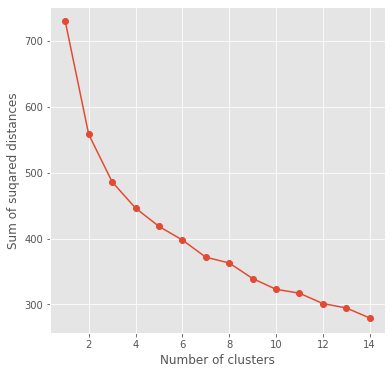

In [125]:
# run Kmeans for multiple values of K and plot to determine best K 

sse = [] 
list_k= list(range(1, 15))

for k in list_k: 
    kmeans = KMeans(n_clusters = k, random_state = 0)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)
    
# plot
plt.style.use('ggplot')
plt.figure(figsize = (6,6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters')
plt.ylabel('Sum of suqared distances')


In [126]:
# the best K seems ambiguous given the plot but 8 or 10 seem like good candidates. We'll go with 10 
kmeans = KMeans(n_clusters = 10).fit(features)

In [104]:
new_restaurants2.insert(1, 'Cluster Labels', kmeans.labels_)

ValueError: cannot insert Cluster Labels, already exists

In [107]:
clustered_restaurants = new_restaurants2.reset_index()
clustered_restaurants.head()

name                                     address  \
0       Baka Gallery Cafe      2256 Bloor W, Toronto, Ontario M6S 1N6   
1  Amsterdam Bicycle Club  54 The Esplanade, Toronto, Ontario M5E 1A6   
2                    Beet     2945 Dundas W, Toronto, Ontario M6P 1Z2   
3             Pho Asia 21       1208 King W, Toronto, Ontario M6K 1G2   
4                  Carver             101 Peter St., Toronto, Ontario   

   Cluster Labels                                           features  \
0               6         BAR, CAFE/COFFEE SHOP, GALLERY, RESTAURANT   
1               4                             BAR, WHEELCHAIR ACCESS   
2               8  BREAKFAST, BRUNCH, CAFE/COFFEE SHOP, DINNER, L...   
3               1                      ASIAN, RESTAURANT, VIETNAMESE   
4               5                   RESTAURANT, SANDWICHES, TAKE-OUT   

                                         description  \
0                                                NaN   
1                                                NaN   
2  Eco-minded café in the Junction with a mostly ...   
3                                                NaN   
4                                                NaN   

                      Clean Addresses        Lat        Lng  \
0      2256 Bloor W, Toronto, Ontario  43.650977 -79.477544   
1  54 The Esplanade, Toronto, Ontario  43.647109 -79.374428   
2     2945 Dundas W, Toronto, Ontario  43.659011 -79.368297   
3       1208 King W, Toronto, Ontario  43.643909 -79.402672   
4     101 Peter St., Toronto, Ontario  43.647512 -79.392777   

   f_ CAFE/COFFEE SHOP  f_ CRITICS' PICKS  ...  f_ REVIEWED  \
0                    1                  0  ...            0   
1                    0                  0  ...            0   
2                    1                  0  ...            1   
3                    0                  0  ...            0   
4                    0                  0  ...            0   

   f_ WHEELCHAIR ACCESS  f_ASIAN  f_BAR  f_BRUNCH  f_CAFE/COFFEE SHOP  \
0                     0        0      1         0                   0   
1                     1        0      1         0                   0   
2                     1        0      0         0                   0   
3                     0        1      0         0                   0   
4                     0        0      0         0                   0   

   f_CONTEMPORARY  f_RESTAURANT                       ids  price  
0               0             0  50e5ef7ee4b0e2b1ec8e24cf      1  
1               0             0  4ada4b1ef964a520022121e3      2  
2               0             0  4ae666dbf964a520dca621e3      1  
3               0             0  5b9c71c0b5cb76002ccba9b9      2  
4               0             1  5434033a498ed37e3c6bb440      1  

[5 rows x 31 columns]

### And there you have it.  A map of restaurants in Toronto grouped by similarity. 

In [127]:
map_clusters = folium.Map(location = [latitude, longitude], zoom_start = 11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, cluster, name, price in zip(clustered_restaurants['Lat'], clustered_restaurants['Lng'],
                                   clustered_restaurants['Cluster Labels'], clustered_restaurants['name'], 
                                         clustered_restaurants['price']):
    label = folium.Popup(str(name) + ': ' + price * '$', parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Get cluster details

In this final step, we will try to get some insight into what characterizes each cluster by looking at the most prominent restaurant features. Essentially, we will look at the top 5 restaurant features in each cluster and create a table listing them in order. 

In [128]:
features.describe()

f_ CAFE/COFFEE SHOP  f_ CRITICS' PICKS   f_ DINNER  f_ LIVE MUSIC  \
count           302.000000         302.000000  302.000000     302.000000   
mean              0.062914           0.062914    0.218543       0.076159   
std               0.243211           0.243211    0.413944       0.265693   
min               0.000000           0.000000    0.000000       0.000000   
25%               0.000000           0.000000    0.000000       0.000000   
50%               0.000000           0.000000    0.000000       0.000000   
75%               0.000000           0.000000    0.000000       0.000000   
max               1.000000           1.000000    1.000000       1.000000   

        f_ LOUNGE    f_ LUNCH  f_ NO RESERVATIONS  f_ OPEN LATE/24 HOURS  \
count  302.000000  302.000000           302.00000             302.000000   
mean     0.033113    0.218543             0.07947               0.096026   
std      0.179228    0.413944             0.27092               0.295117   
min      0.000000    0.000000             0.00000               0.000000   
25%      0.000000    0.000000             0.00000               0.000000   
50%      0.000000    0.000000             0.00000               0.000000   
75%      0.000000    0.000000             0.00000               0.000000   
max      1.000000    1.000000             1.00000               1.000000   

       f_ OUTDOOR SEATING  f_ PRIX FIXE  ...  f_ RESTAURANT  f_ REVIEWED  \
count          302.000000    302.000000  ...     302.000000   302.000000   
mean             0.208609      0.033113  ...       0.662252     0.264901   
std              0.406989      0.179228  ...       0.473727     0.442013   
min              0.000000      0.000000  ...       0.000000     0.000000   
25%              0.000000      0.000000  ...       0.000000     0.000000   
50%              0.000000      0.000000  ...       1.000000     0.000000   
75%              0.000000      0.000000  ...       1.000000     1.000000   
max              1.000000      1.000000  ...       1.000000     1.000000   

       f_ WHEELCHAIR ACCESS     f_ASIAN       f_BAR    f_BRUNCH  \
count            302.000000  302.000000  302.000000  302.000000   
mean               0.049669    0.049669    0.397351    0.052980   
std                0.217621    0.217621    0.490162    0.224366   
min                0.000000    0.000000    0.000000    0.000000   
25%                0.000000    0.000000    0.000000    0.000000   
50%                0.000000    0.000000    0.000000    0.000000   
75%                0.000000    0.000000    1.000000    0.000000   
max                1.000000    1.000000    1.000000    1.000000   

       f_CAFE/COFFEE SHOP  f_CONTEMPORARY  f_RESTAURANT       price  
count          302.000000      302.000000    302.000000  302.000000  
mean             0.158940        0.036424      0.056291    1.635762  
std              0.366227        0.187653      0.230866    0.609814  
min              0.000000        0.000000      0.000000    1.000000  
25%              0.000000        0.000000      0.000000    1.000000  
50%              0.000000        0.000000      0.000000    2.000000  
75%              0.000000        0.000000      0.000000    2.000000  
max              1.000000        1.000000      1.000000    4.000000  

[8 rows x 22 columns]

In [143]:
# get most common features

def mostCommonFeatures(row, num_top_features): 
    row_feature = row.iloc[:-1]
    row_feature_sorted = row_feature.sort_values(ascending = False)
    
    return row_feature_sorted.index.values[0:num_top_features]

In [138]:
most_common = features.reset_index()
most_common.insert(1, 'Cluster Labels', kmeans.labels_)
most_common = most_common.groupby(by = ['Cluster Labels']).mean()
most_common.head()

f_ CAFE/COFFEE SHOP  f_ CRITICS' PICKS  f_ DINNER  \
Cluster Labels                                                      
0                          0.108696           0.000000   0.000000   
1                          0.000000           0.200000   0.966667   
2                          0.076923           0.153846   0.000000   
3                          0.105263           0.026316   0.000000   
4                          0.000000           0.285714   0.904762   

                f_ LIVE MUSIC  f_ LOUNGE  f_ LUNCH  f_ NO RESERVATIONS  \
Cluster Labels                                                           
0                    0.217391   0.108696  0.000000            0.000000   
1                    0.033333   0.000000  0.833333            0.000000   
2                    0.000000   0.000000  0.384615            0.000000   
3                    0.052632   0.105263  0.000000            0.026316   
4                    0.000000   0.000000  0.952381            1.000000   

                f_ OPEN LATE/24 HOURS  f_ OUTDOOR SEATING  f_ PRIX FIXE  ...  \
Cluster Labels                                                           ...   
0                            0.021739            0.108696      0.000000  ...   
1                            0.466667            0.566667      0.266667  ...   
2                            0.000000            1.000000      0.000000  ...   
3                            0.000000            0.131579      0.000000  ...   
4                            0.285714            0.333333      0.095238  ...   

                f_ RESTAURANT  f_ REVIEWED  f_ WHEELCHAIR ACCESS   f_ASIAN  \
Cluster Labels                                                               
0                    0.543478     0.108696              0.000000  0.000000   
1                    0.966667     0.933333              0.133333  0.166667   
2                    0.923077     1.000000              0.230769  0.000000   
3                    0.000000     0.026316              0.052632  0.000000   
4                    1.000000     0.714286              0.095238  0.095238   

                   f_BAR  f_BRUNCH  f_CAFE/COFFEE SHOP  f_CONTEMPORARY  \
Cluster Labels                                                           
0               1.000000  0.000000            0.000000        0.000000   
1               0.066667  0.200000            0.000000        0.100000   
2               0.076923  0.076923            0.538462        0.000000   
3               0.605263  0.000000            0.000000        0.000000   
4               0.047619  0.142857            0.000000        0.047619   

                f_RESTAURANT     price  
Cluster Labels                          
0                   0.000000  1.000000  
1                   0.000000  2.166667  
2                   0.000000  1.307692  
3                   0.289474  2.184211  
4                   0.000000  1.571429  

[5 rows x 22 columns]

In [147]:
num_top_features = 5
indicators = ['st', 'nd', 'rd']
columns = ['Cluster']

for ind in np.arange(num_top_features): 
    try: 
        columns.append('{}{} Most Common Feature'.format(ind + 1, indicators[ind]))
    except: 
        columns.append('{}th Most Common Feature'.format(ind + 1))
# new df 
new_df = pd.DataFrame(columns = columns)
new_df['Cluster'] = most_common.reset_index()['Cluster Labels']

In [176]:
for ind in np.arange(most_common.shape[0]):
    new_df.iloc[ind ,1:] = mostCommonFeatures(most_common.iloc[ind, :], num_top_features)
    
new_df = new_df.set_index('Cluster')
new_df

1st Most Common Feature 2nd Most Common Feature  \
Cluster                                                   
0                         f_BAR           f_ RESTAURANT   
1                 f_ RESTAURANT               f_ DINNER   
2            f_ OUTDOOR SEATING             f_ REVIEWED   
3                         f_BAR            f_RESTAURANT   
4                 f_ RESTAURANT      f_ NO RESERVATIONS   
5                 f_ RESTAURANT               f_ DINNER   
6            f_CAFE/COFFEE SHOP           f_ RESTAURANT   
7                 f_ RESTAURANT                 f_ASIAN   
8                         f_BAR           f_ RESTAURANT   
9            f_CAFE/COFFEE SHOP           f_ RESTAURANT   

        3rd Most Common Feature 4th Most Common Feature  \
Cluster                                                   
0                 f_ LIVE MUSIC     f_ CAFE/COFFEE SHOP   
1                   f_ REVIEWED                f_ LUNCH   
2                 f_ RESTAURANT      f_CAFE/COFFEE SHOP   
3            f_ OUTDOOR SEATING               f_ LOUNGE   
4                      f_ LUNCH               f_ DINNER   
5                   f_ REVIEWED                f_ LUNCH   
6            f_ OUTDOOR SEATING       f_ CRITICS' PICKS   
7                  f_RESTAURANT                f_ LUNCH   
8                 f_ LIVE MUSIC             f_ PUB GRUB   
9                 f_ LIVE MUSIC            f_RESTAURANT   

        5th Most Common Feature  
Cluster                          
0                     f_ LOUNGE  
1            f_ OUTDOOR SEATING  
2                      f_ LUNCH  
3           f_ CAFE/COFFEE SHOP  
4                   f_ REVIEWED  
5            f_ OUTDOOR SEATING  
6                 f_ LIVE MUSIC  
7         f_ OPEN LATE/24 HOURS  
8           f_ CAFE/COFFEE SHOP  
9            f_ OUTDOOR SEATING

### Plot cluster size

We can plot cluster sizes to see which groups are more common in Toronto

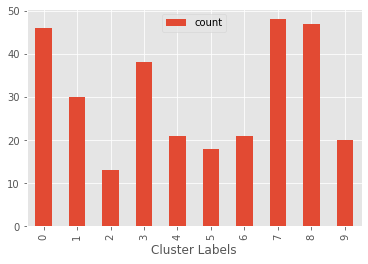

In [171]:
# cluster counts
cluster_count = features.groupby('Cluster Labels').count()
cluster_count = cluster_count.iloc[:,:1]
cluster_count.columns = ['count']
cluster_count

cluster_count.plot(kind = 'bar')

## Results and Discussion: 

Our analysis shows that there is a large number of restaurants in Toronto (>2,000) which can be broken into a significant number of subgroups (eg. pizza shops, sushi, etc.). This signals the amazing diversity of food Toronto is famous for. Of a 300 restaurant sample, it seems like the restaurants in the city generally fall into 10 distinct categories. Among these categories, Asian restaurants and Bars/Pubs (Clusters: 0, 7, 8) are the most common. Coffee shops also make up an important group. On the other hand, restaurants which are primarily characterized by their outdoor seating are more scarce. 

A further analysis including a more complete list of restaurants could uncover dominating niches by geographic clusters. For example, we could find out which group of restaurants tend to be more common in the Financial District or Entertainment Districts. 

## Conclusion: 

By collecting data on Toronto restaurants and their respective features, we were able to group them into clusters using a k-means algorithm and determine the most common groups of restaurants in the city. 
A sample of roughly 300 Toronto restaurants suggests that restaurants can be clustered into 10 distinct groups with the most common groups being Asian Restaurants and Bars/Pubs. 

While the purpose of this report is not to recommend any particular course of action, it can help to narrow the scope of competition to restaurants which are most alike by segmenting the market. This allows restaurants within a same niche to better understand how to differentiate themselves and to hone in on trends impacting their community of restaurants. 